# ESDP - Homework 2
Johanna Kasischke

## Jupyter notebook for downloading ERA5 humidity data and processing

In [28]:
import cdsapi

c = cdsapi.Client()

dataset = "derived-era5-pressure-levels-daily-statistics"
#request = {
c.retrieve(dataset, {
    "class": "ea",
    "product_type": "reanalysis",
    "variable": ["specific_humidity"],
    "year": "2024",
    "month": ["12"],
    "day": [
        "01", "02", "03",
        "04", "05"
    ],
    "pressure_level": [
        "300", "500", "800",
        "900", "975"
    ],
    "daily_statistic": "daily_mean",
    "time_zone": "utc+00:00",
    "frequency": "6_hourly",
    "grid": "5.625/5.625",
    "format": "netcdf",
    "type": "fc",
    "levtype": "pl",
    "step": "6",
    "stream": "oper",
}, "output")



2025-12-22 16:02:40,756 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-22 16:02:41,204 INFO Request ID is 10fcc8e6-2e8a-40c0-94c1-6c742be086c2
2025-12-22 16:02:41,279 INFO status has been updated to accepted
2025-12-22 16:03:03,075 INFO status has been updated to running
2025-12-22 16:03:31,687 INFO status has been updated to successful


'output'

In [29]:
# Try opening the retrieved data with xarray
import xarray as xr
ds = xr.open_dataset('output', engine='netcdf4')
print(ds)

<xarray.Dataset> Size: 212kB
Dimensions:         (valid_time: 5, pressure_level: 5, latitude: 33,
                     longitude: 64)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 264B 90.0 84.38 78.75 ... -84.38 -90.0
  * longitude       (longitude) float64 512B 0.0 5.625 11.25 ... 348.8 354.4
    number          int64 8B ...
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 211kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-22T15:03 GRIB to CDM+CF via cfgrib-0.9.1...


In [30]:
# Let us inspect the time steps that we retrieved
print(ds['valid_time'])

<xarray.DataArray 'valid_time' (valid_time: 5)> Size: 40B
array(['2024-12-01T00:00:00.000000000', '2024-12-02T00:00:00.000000000',
       '2024-12-03T00:00:00.000000000', '2024-12-04T00:00:00.000000000',
       '2024-12-05T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
    number      int64 8B ...
Attributes:
    long_name:      time
    standard_name:  time
    time_shift:     0 days 00:00:00


In [31]:
ds.dims

FrozenMappingWarningOnValuesAccess({'valid_time': 5, 'pressure_level': 5, 'latitude': 33, 'longitude': 64})

In [32]:
ds.coords

Coordinates:
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 264B 90.0 84.38 78.75 ... -84.38 -90.0
  * longitude       (longitude) float64 512B 0.0 5.625 11.25 ... 348.8 354.4
    number          int64 8B ...

In [33]:
ds.data_vars

Data variables:
    q        (valid_time, pressure_level, latitude, longitude) float32 211kB ...

In [34]:
ds.attrs

{'GRIB_centre': 'ecmf',
 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts',
 'GRIB_subCentre': np.int64(0),
 'Conventions': 'CF-1.7',
 'institution': 'European Centre for Medium-Range Weather Forecasts',
 'history': '2025-12-22T15:03 GRIB to CDM+CF via cfgrib-0.9.15.1/ecCodes-2.42.0 with {"source": "specific_humidity.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}\nearthkit.transforms.aggregate.temporal.daily_reduce(specific_humidity_stream-oper, how=mean, **{\'time_shift\': {\'hours\': 0}})'}

In [35]:
ds['q']

<xarray.DataArray 'q' (valid_time: 5, pressure_level: 5, latitude: 33,
                       longitude: 64)> Size: 211kB
[52800 values with dtype=float32]
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 264B 90.0 84.38 78.75 ... -84.38 -90.0
  * longitude       (longitude) float64 512B 0.0 5.625 11.25 ... 348.8 354.4
    number          int64 8B ...
Attributes: (12/31)
    GRIB_paramId:                             133
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2112
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           q
    GRIB_totalNumber:                         0
    GRIB_units:                               kg kg**-1
    long_name:                                Specific humidity
    units:                                    kg kg**-1
    standard_name:                            specific_humidity

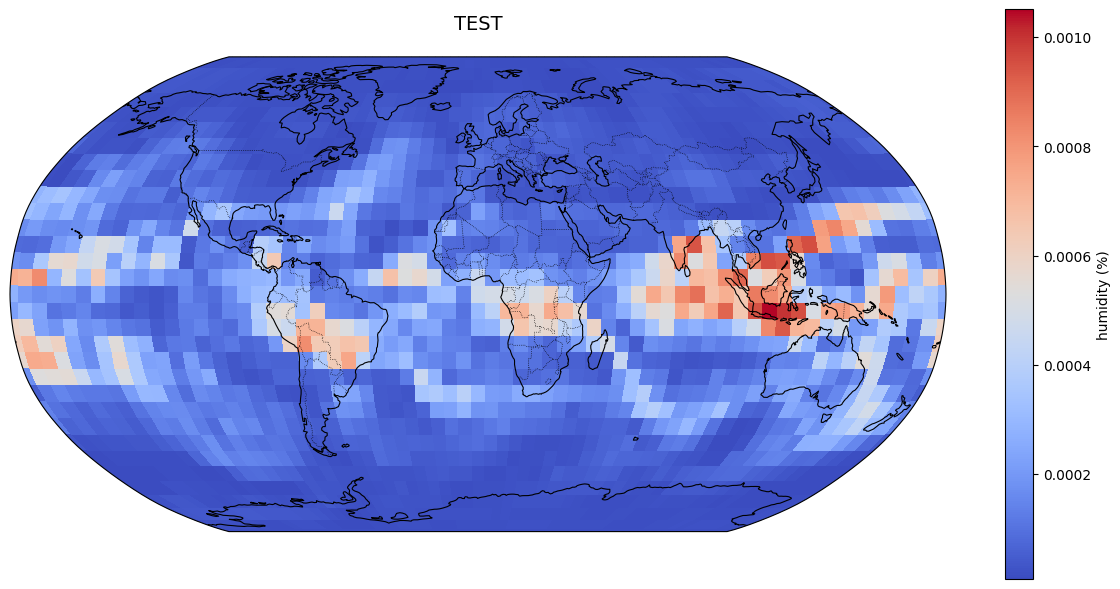

In [36]:
%matplotlib inline
# and produce a simple plot of the 1000 hPa temperature field
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select data for pressure level 1000 hPa (index 0, since pressure_level[0] = 1000.0)
# and valid_time on April 3, 2021 at 00:00
t_data = ds['q'].sel(
    pressure_level=300.0,
    valid_time='2024-12-01T00:00:00'
)

# Create the plot with Robinson projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

# Plot the temperature field
cf = t_data.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # Data is in PlateCarree (lon/lat)
    cmap='coolwarm',
    cbar_kwargs={'label': 'humidity (%)'},
    add_colorbar=True,
    add_labels=False  # Avoid duplicate labels
)

# Set title
ax.set_title('TEST', fontsize=14, pad=20)

# Add coastlines and country borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Set global view
ax.set_global()

# Improve layout
plt.tight_layout()